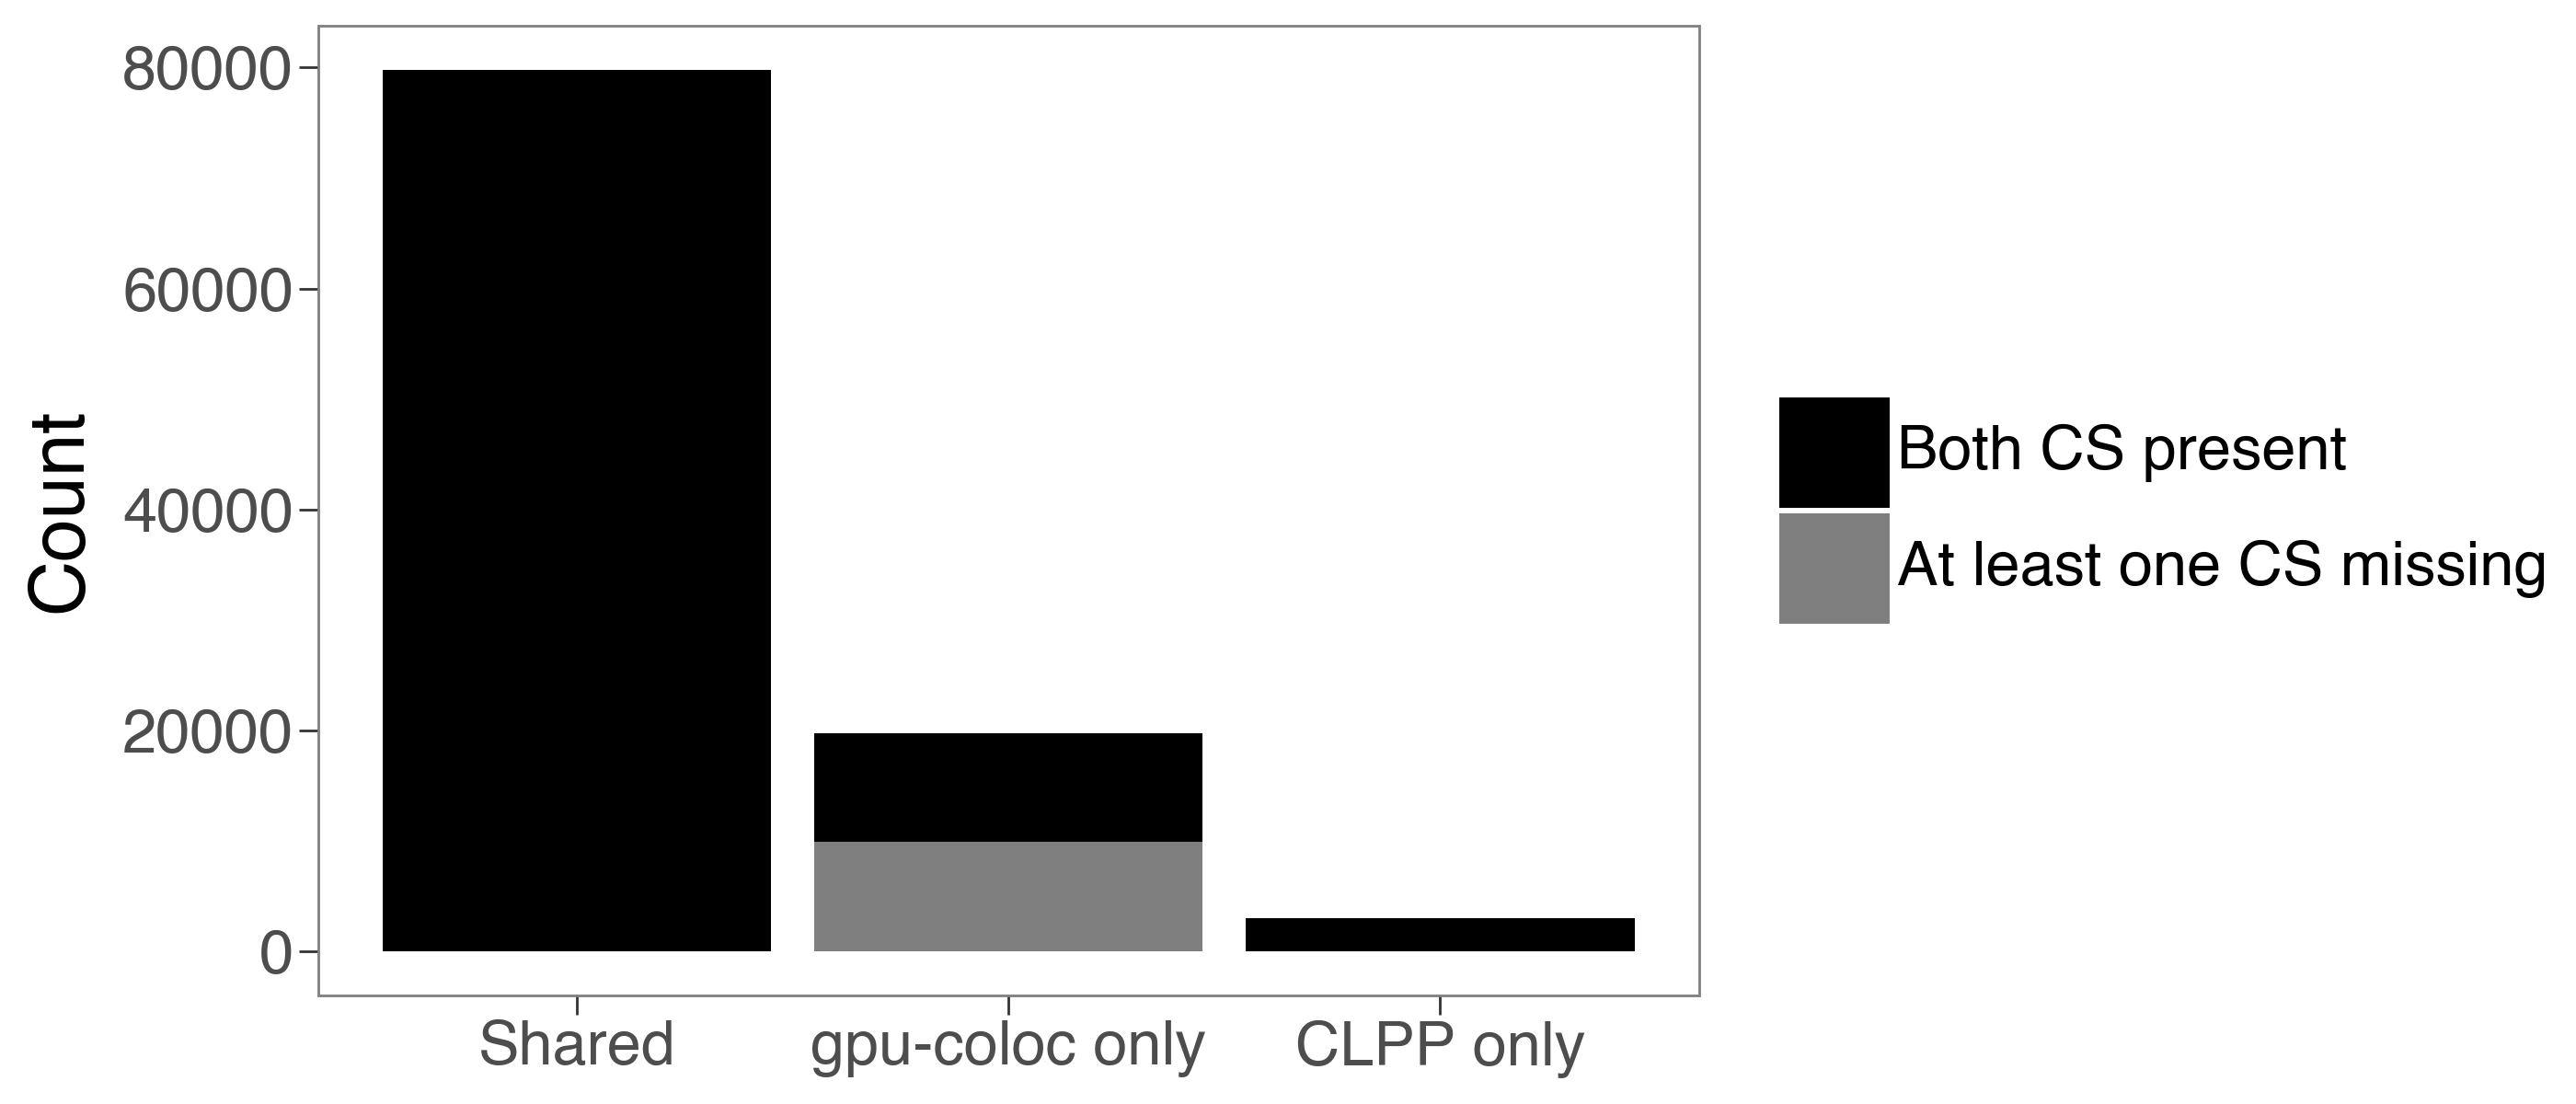

In [1]:
import numpy as np
import pandas as pd
from plotnine import (
    ggplot, aes, geom_bar, labs,
    scale_fill_manual, theme_bw, theme,
    element_text, element_blank
)

p1e6 = pd.read_csv("../data/finngen_lbf_results_0.8_1e-6.tsv", sep="\t")
clpp = pd.read_csv("../data/finngen_clpp_results.tsv", sep="\t")

clpp = clpp[clpp["signal_a"] != clpp["signal_b"]]
credible_sets = np.load("../data/FinnGen_and_eQTL_Catalogue_credible_sets.npy", allow_pickle=True).tolist()

clpp = clpp[(clpp["clpp"]>=0.04)]
p1e6 = p1e6[(p1e6["PP.H4"]>=0.8)]

merged = p1e6.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'])
p1e6.shape[0], clpp.shape[0]

p1e6["FinnGen_cs"] = p1e6["signal1"].isin(credible_sets)
p1e6["EQTL_cs"] = p1e6["signal2"].isin(credible_sets)

p1e6["Category"] = "Neither"
p1e6.loc[p1e6["FinnGen_cs"] & p1e6["EQTL_cs"], "Category"] = "Both CS"
p1e6.loc[p1e6["FinnGen_cs"] & ~p1e6["EQTL_cs"], "Category"] = "Only FG CS"
p1e6.loc[~p1e6["FinnGen_cs"] & p1e6["EQTL_cs"], "Category"] = "Only eQTL CS"

category_counts = p1e6["Category"].value_counts()

both_cs_total = category_counts.get("Both CS", 0)
both_cs_in_merged = merged[
    merged["signal1"].isin(p1e6[p1e6["Category"] == "Both CS"]["signal1"]) &
    merged["signal2"].isin(p1e6[p1e6["Category"] == "Both CS"]["signal2"])
].shape[0]
both_cs_not_merged = both_cs_total - both_cs_in_merged

only_clpp = clpp.merge(merged, left_on=['signal_a', 'signal_b'], right_on=['signal1', 'signal2'], how='left', indicator=True)
only_clpp_count = only_clpp[only_clpp['_merge'] == 'left_only'].shape[0]

shared_both  = both_cs_in_merged                
gpu_both     = both_cs_not_merged             
gpu_missing  = (category_counts.get("Only FG CS", 0) +
                category_counts.get("Only eQTL CS", 0) +
                category_counts.get("Neither", 0)) 
clpp_both    = only_clpp_count               

plot_df = pd.DataFrame({
    "Group" : ["Shared",
               "gpu-coloc only", "gpu-coloc only",
               "CLPP only"],
    "Status": ["Both CS present",
               "Both CS present", "At least one CS missing",
               "Both CS present"],
    "Count" : [shared_both,
               gpu_both, gpu_missing,
               clpp_both]
})

plot_df["Group"] = pd.Categorical(plot_df["Group"],
                                  ["Shared", "gpu-coloc only", "CLPP only"])
plot_df["Status"] = pd.Categorical(plot_df["Status"],
                                   ["Both CS present", "At least one CS missing"])

(
    ggplot(plot_df, aes("Group", "Count", fill="Status")) +
    geom_bar(stat="identity", width=0.9, position="stack") +

    scale_fill_manual(values={
        "Both CS present": "#000000",      
        "At least one CS missing": "#7f7f7f"  
    }) +

    labs(x="", y="Count") +
    theme_bw(base_size=30) +
    theme(
        figure_size=(14, 6),
        axis_text_x=element_text(
            rotation=0, vjust=1,           
        ),
        panel_grid=element_blank(),          
        legend_title=element_blank()
    )
)

In [ ]:
import numpy as np
import pandas as pd
from plotnine import (
    ggplot, aes, geom_bar, labs,
    scale_fill_manual, theme_bw, theme,
    element_text, element_blank
)

p1e6 = pd.read_csv("../data/metabolic_lbf_results_0.8_1e-6.tsv", sep="\t")
clpp = pd.read_csv("../data/met_ge_clpp.tsv", sep="\t")

clpp = clpp[clpp["signal_a"] != clpp["signal_b"]]
credible_sets = np.load("../data/FinnGen_and_eQTL_Catalogue_credible_sets.npy", allow_pickle=True).tolist()

met = pd.read_csv("../data/56_metabolites_finemapping_credible_sets.tsv", sep="\t")
met_credible_sets = list(met["cs_id"].unique())

clpp = clpp[(clpp["clpp"]>=0.04)]
p1e6 = p1e6[(p1e6["PP.H4"]>=0.8)]

merged = p1e6.merge(clpp, left_on=['signal1', 'signal2'], right_on=['signal_a', 'signal_b'])
p1e6.shape[0], clpp.shape[0]

p1e6["Met_cs"] = p1e6["signal1"].isin(met_credible_sets)
p1e6["EQTL_cs"] = p1e6["signal2"].isin(credible_sets)

p1e6["Category"] = "Neither"
p1e6.loc[p1e6["Met_cs"] & p1e6["EQTL_cs"], "Category"] = "Both CS"
p1e6.loc[p1e6["Met_cs"] & ~p1e6["EQTL_cs"], "Category"] = "Only Met CS"
p1e6.loc[~p1e6["Met_cs"] & p1e6["EQTL_cs"], "Category"] = "Only eQTL CS"

category_counts = p1e6["Category"].value_counts()

both_cs_total = category_counts.get("Both CS", 0)
both_cs_in_merged = merged[
    merged["signal1"].isin(p1e6[p1e6["Category"] == "Both CS"]["signal1"]) &
    merged["signal2"].isin(p1e6[p1e6["Category"] == "Both CS"]["signal2"])
].shape[0]
both_cs_not_merged = both_cs_total - both_cs_in_merged

only_clpp = clpp.merge(merged, left_on=['signal_a', 'signal_b'], right_on=['signal1', 'signal2'], how='left', indicator=True)
only_clpp_count = only_clpp[only_clpp['_merge'] == 'left_only'].shape[0]

shared_both  = both_cs_in_merged                
gpu_both     = both_cs_not_merged             
gpu_missing  = (category_counts.get("Only FG CS", 0) +
                category_counts.get("Only eQTL CS", 0) +
                category_counts.get("Neither", 0)) 
clpp_both    = only_clpp_count               

plot_df = pd.DataFrame({
    "Group" : ["Shared",
               "gpu-coloc only", "gpu-coloc only",
               "CLPP only"],
    "Status": ["Both CS present",
               "Both CS present", "At least one CS missing",
               "Both CS present"],
    "Count" : [shared_both,
               gpu_both, gpu_missing,
               clpp_both]
})

plot_df["Group"] = pd.Categorical(plot_df["Group"],
                                  ["Shared", "gpu-coloc only", "CLPP only"])
plot_df["Status"] = pd.Categorical(plot_df["Status"],
                                   ["Both CS present", "At least one CS missing"])

(
    ggplot(plot_df, aes("Group", "Count", fill="Status")) +
    geom_bar(stat="identity", width=0.9, position="stack") +

    scale_fill_manual(values={
        "Both CS present": "#000000",      
        "At least one CS missing": "#7f7f7f"  
    }) +

    labs(x="", y="Count") +
    theme_bw(base_size=30) +
    theme(
        figure_size=(14, 6),
        axis_text_x=element_text(
            rotation=0, vjust=1,           
        ),
        panel_grid=element_blank(),          
        legend_title=element_blank()
    )
)

FileNotFoundError: [Errno 2] No such file or directory: '56_metabolites_finemapping_credible_sets.tsv'